In [16]:
import pandas as pd

df = pd.read_csv('MSFTData.csv') # Read the csv file

df # Display the data at this point

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT
...,...,...,...,...,...,...,...
3014,2017-12-22,85.40,85.63,84.92,85.51,14145841,MSFT
3015,2017-12-26,85.31,85.53,85.03,85.40,9891237,MSFT
3016,2017-12-27,85.65,85.98,85.22,85.71,14678025,MSFT
3017,2017-12-28,85.90,85.93,85.55,85.72,10594344,MSFT


In [17]:
df = df[['Date', 'Close']] # Selecting only the date and close columns

df # Display the modified data

,Date,Close
0,2006-01-03,26.84
1,2006-01-04,26.97
2,2006-01-05,26.99
3,2006-01-06,26.91
4,2006-01-09,26.86
...,...,...
3014,2017-12-22,85.51
3015,2017-12-26,85.40
3016,2017-12-27,85.71
3017,2017-12-28,85.72


In [18]:
df['Date'] # DIsplay the 'Date' column

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3014    2017-12-22
3015    2017-12-26
3016    2017-12-27
3017    2017-12-28
3018    2017-12-29
Name: Date, Length: 3019, dtype: object

In [19]:
import datetime

def str_to_time(s): # Helper function that convertes date strings to datetime objects
    split = s.split('-') # Split the string by the hyphen
    year, month, day = int(split[0]), int(split[1]), int(split[2]) # Assign the split values where appropriate
    return datetime.datetime(year=year, month=month, day=day) # Return the datetime object

datetime_obj = str_to_time('2006-01-03') # Convert sample date string to datetime object
datetime_obj # Display datetime object


datetime.datetime(2006, 1, 3, 0, 0)

In [20]:
df 

,Date,Close
0,2006-01-03,26.84
1,2006-01-04,26.97
2,2006-01-05,26.99
3,2006-01-06,26.91
4,2006-01-09,26.86
...,...,...
3014,2017-12-22,85.51
3015,2017-12-26,85.40
3016,2017-12-27,85.71
3017,2017-12-28,85.72


In [21]:
df = df.reset_index()  # Reset the index to make 'Date' a column
df['Date'] = df['Date'].apply(str_to_time)
df['Date']

0      2006-01-03
1      2006-01-04
2      2006-01-05
3      2006-01-06
4      2006-01-09
          ...    
3014   2017-12-22
3015   2017-12-26
3016   2017-12-27
3017   2017-12-28
3018   2017-12-29
Name: Date, Length: 3019, dtype: datetime64[ns]

In [22]:
df.index = df.pop('Date') #Set 'Date' as the index, remove 'Date' column from dataframe
df # Display the modified data

,index,Close
Date,,
2006-01-03,0,26.84
2006-01-04,1,26.97
2006-01-05,2,26.99
2006-01-06,3,26.91
2006-01-09,4,26.86
...,...,...
2017-12-22,3014,85.51
2017-12-26,3015,85.40
2017-12-27,3016,85.71


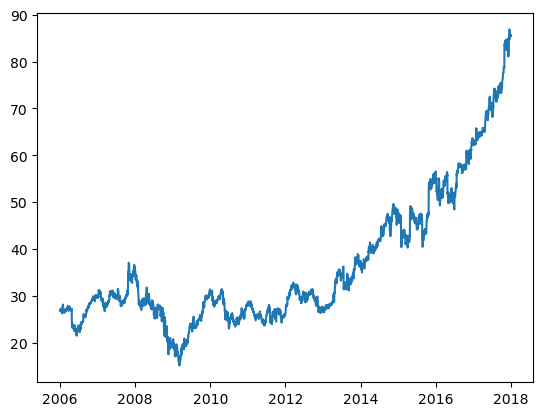

In [23]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close']) # Plot the stock's closing prices

In [31]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3): # Function that converts dataframe to windowed format for ML tasks
  first_date = str_to_time(first_date_str) # Convert string to datetime objects with previous helper function
  last_date  = str_to_time(last_date_str)

  target_date = first_date # Initialize the starting date
  
  dates = [] # List to store data
  X, Y = [], [] # X stores features, and Y stores target values

  last_time = False # Boolean to know when to stop processing
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1) # Extract most recent n+1 rows up to current target 
    
    if len(df_subset) != n+1: # If there is not enough rows for a window, print an error and exit function
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy() # Extract the values in Close as an array
    x, y = values[:-1], values[-1] # Split the values into features and target

    dates.append(target_date) # Append the target date, featrues, and target values to the list
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)] # Identify next date one week ahead

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0]) # Extract valid date in the next week
    next_date_str = next_datetime_str.split('T')[0]

    year_month_day = next_date_str.split('-') # Parse string into datetime object
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time: # When reaching the last date, stop the loop
      break
    
    target_date = next_date # Update target date to next date
 
    if target_date == last_date: # If target date equals last date, mark as final iteration
      last_time = True
    
  ret_df = pd.DataFrame({}) # Create a new dataframe to store data
  ret_df['Target Date'] = dates # Add the dates to the dataframe
  
  X = np.array(X) # Convert the features and target values to numpy array

  for i in range(0, n): # Add each feature column to the dataframe
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y # Add target column (this will be the future value we want to predict)

  return ret_df # Return the new dataframe

# The first date is the beginning date, second date is the end date, modify as necessary
windowed_df = df_to_windowed_df(df, 
                                '2007-05-25', 
                                '2008-05-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2007-05-25,30.69,30.58,30.17,30.48
1,2007-05-29,30.58,30.17,30.48,30.79
2,2007-05-30,30.17,30.48,30.79,31.11
3,2007-05-31,30.48,30.79,31.11,30.69
4,2007-06-01,30.79,31.11,30.69,30.59
...,...,...,...,...,...
247,2008-05-19,29.93,30.45,29.99,29.46
248,2008-05-20,30.45,29.99,29.46,28.76
249,2008-05-21,29.99,29.46,28.76,28.25
250,2008-05-22,29.46,28.76,28.25,28.47


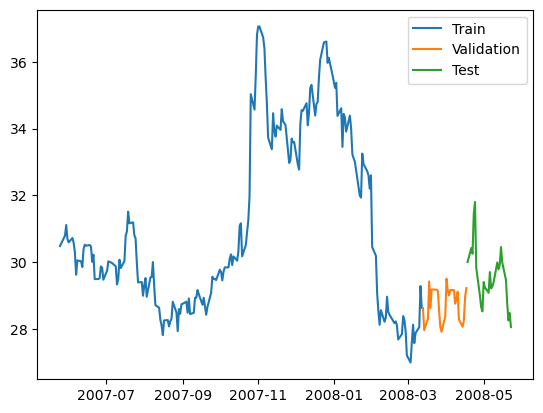

In [25]:
def windowed_df_to_date_X_y(windowed_dataframe): # Function that will split a windowed df into dates, features (X), and target values(y)
    df_as_np = windowed_dataframe.to_numpy() # Convert the dataframe to a numpy array

    dates = df_as_np[:, 0] # Extract the dates windowed_df = df_to_windowed_df(df, 
                                # '2007-05-25', 
                                # '2008-05-23', 
                                # n=3)

    middle_matrix = df_as_np[:, 1:-1] # Extract the feature column
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # Reshape the features to be 3D

    Y = df_as_np[:, -1] # Get all the contents of the first column, and the last column

    return dates, X.astype(np.float32), Y.astype(np.float32) # Return the dates, features, and target values

dates, X, y = windowed_df_to_date_X_y(windowed_df) # Split the windowed dataframe

dates.shape, X.shape, y.shape # Print the shape of the resulting arrays

# These numbers help us split the partitions we want
q_80 = int(len(dates) * 0.8) 
q_90 = int(len(dates) * 0.9)

# Splits data into training, validation, and testing partitions
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Plot target values for each data partition
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# The LSTM model for the time-series prediction
model = Sequential([layers.Input((3, 1)), # Inputer laye with shape matching the feature dimensions
                    layers.LSTM(64), # LSTM layer with 64 units
                    layers.Dense(32, activation='relu'), # Fully connected layer with ReLU activation
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)]) # Output layer that predicts one value

# Compile model with msel and adam optimizer
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics = ['mean_absolute_error']) # mean squared error, play around with learning rate

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) # Train the model on training data and validate on validation data


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 976.1567 - mean_absolute_error: 31.1330 - val_loss: 790.0101 - val_mean_absolute_error: 28.1031
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 920.8442 - mean_absolute_error: 30.2304 - val_loss: 738.0002 - val_mean_absolute_error: 27.1620
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 858.6566 - mean_absolute_error: 29.1930 - val_loss: 676.2413 - val_mean_absolute_error: 26.0003
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 799.9039 - mean_absolute_error: 28.1463 - val_loss: 596.7495 - val_mean_absolute_error: 24.4238
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 694.5914 - mean_absolute_error: 26.2233 - val_loss: 494.4670 - val_mean_absolute_error: 22.2315
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 582.8846 - mean_absolute_error: 23.9739 - val_loss: 367.6166 - val_mean_absolute_error: 19.1673
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 432.7757 - mean_ab

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


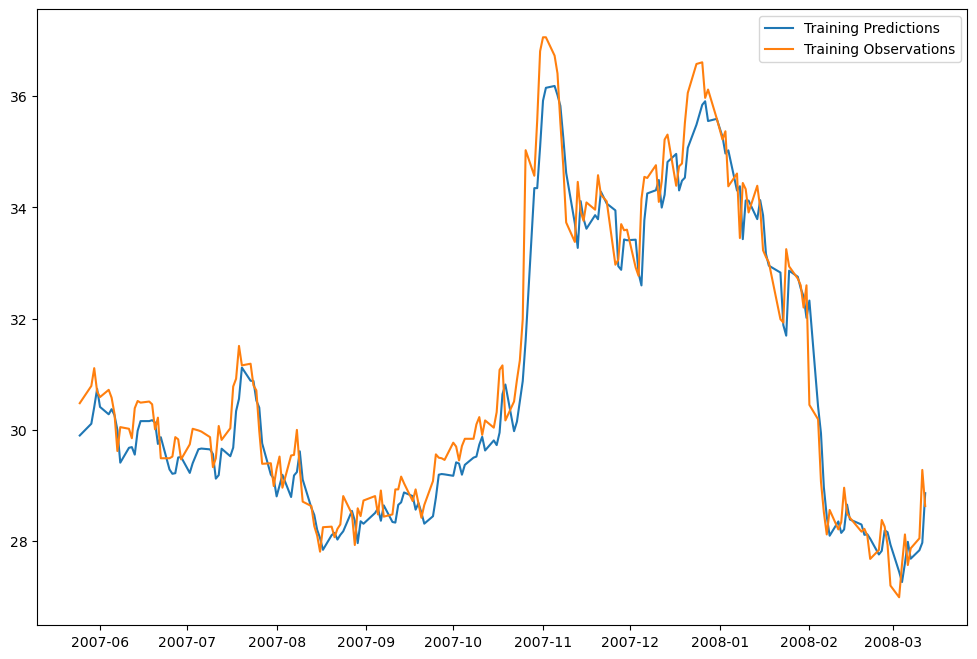

In [27]:
train_predictions = model.predict(X_train).flatten() # Generate predictions for training set and flatten to match target shape

plt.figure(figsize=(12,8)) # Make graph a little bigger


plt.plot(dates_train, train_predictions) # Plot the training predictions
plt.plot(dates_train, y_train) # Plot the training target values
plt.legend(['Training Predictions', 'Training Observations']) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


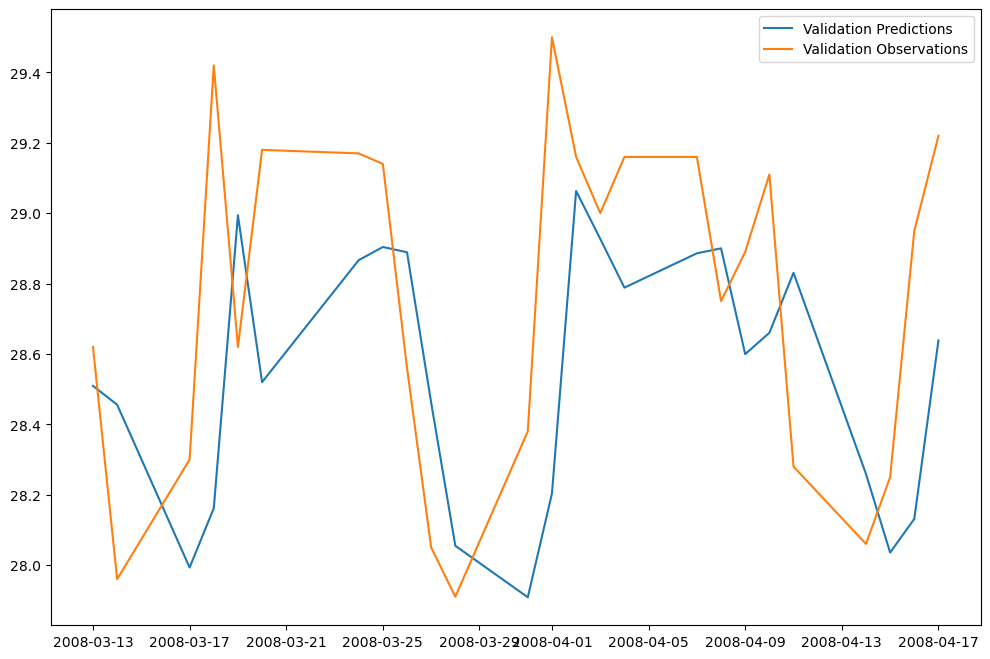

In [28]:
val_predictions = model.predict(X_val).flatten() # Generate predictions for validation set, same as train_predictions just with validation data

plt.figure(figsize=(12,8))


plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


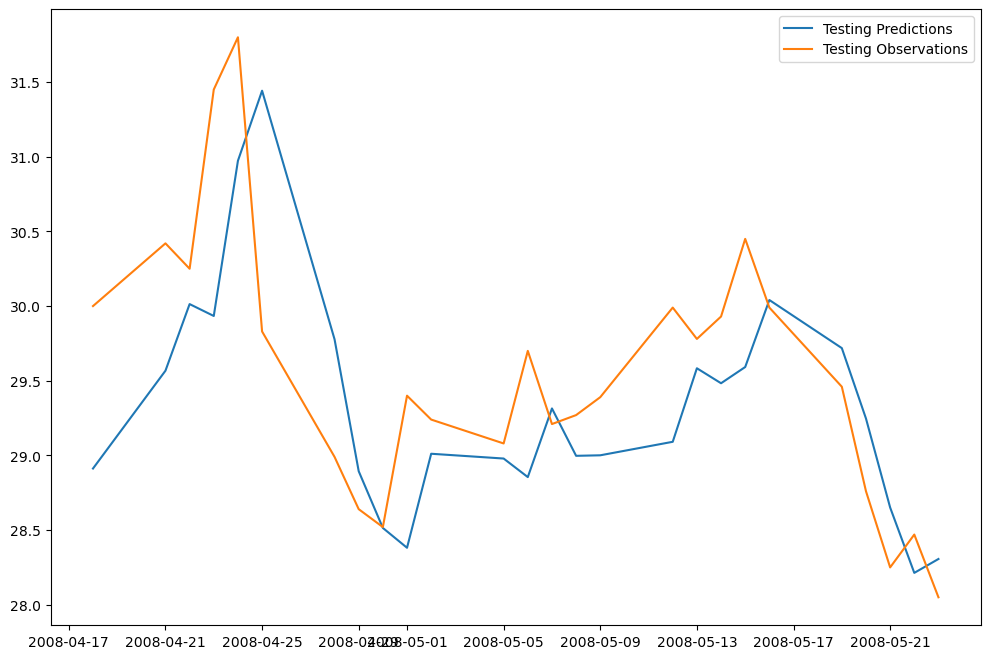

In [29]:
test_predictions = model.predict(X_test).flatten() # Generate predictions for testing set

plt.figure(figsize=(12,8))


plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

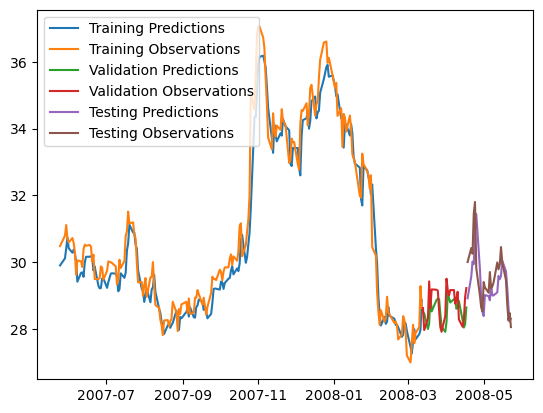

In [30]:
# Combine all three graphs together
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])